<a href="https://colab.research.google.com/github/NDDV/House-Price-predict/blob/main/Career_HousePrice_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#ApartmentTrading data

In [ ]:
#Đọc dữ liệu
at_data = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
at_data.head(5)

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,75.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,6300.0,84.000000,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
1,115.0,Đông Nam,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,10250.0,89.130435,NaN,NaN,5e958ee8208d0d6d7648f9d1,Phố Ngọc Khánh,NaN,NaN,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
2,100.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,2600.0,26.000000,NaN,NaN,5e958ee8208d0d6d7648f9da,Phố Thành Công Bắc,NaN,NaN,5e5501cbeb80a7245175e0ee,Phường Thành Công
3,30.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,2.0,NaN,NaN,...,3500.0,116.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,72.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,3.0,NaN,NaN,...,1750.0,24.305556,NaN,NaN,5e958ee8208d0d6d7648f9bf,Phố Đặng Dung,NaN,NaN,5e5501cbeb80a7245175e0e7,Phường Quán Thánh


In [ ]:
#Đọc thông tin dữ liệu
at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37259 entries, 0 to 37258
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         36303 non-null  float64
 1   huong_ban_cong    12510 non-null  object 
 2   phong_ngu         26873 non-null  float64
 3   id_thanh_pho      37259 non-null  object 
 4   ten_thanh_pho     37259 non-null  object 
 5   id_quan           37259 non-null  object 
 6   ten_quan          37259 non-null  object 
 7   so_tang           2390 non-null   float64
 8   mat_tien          336 non-null    float64
 9   noi_that          14294 non-null  object 
 10  huong_nha         15144 non-null  object 
 11  so_do             16172 non-null  object 
 12  lat               37217 non-null  float64
 13  long              37217 non-null  float64
 14  gia               32136 non-null  float64
 15  gia_m2            32090 non-null  float64
 16  du_an             8557 non-null   object

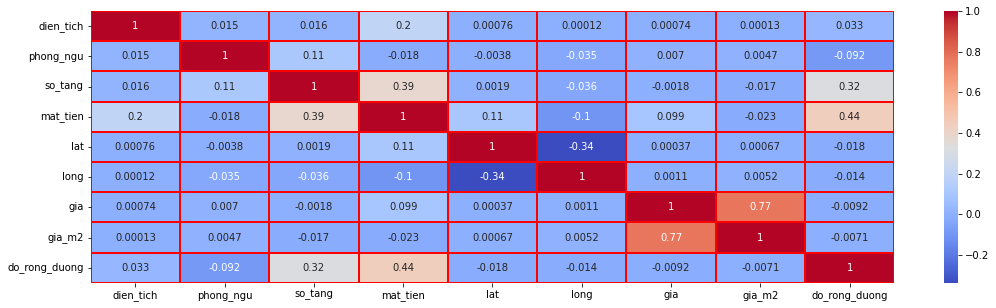

In [ ]:
plt.figure(figsize=(18,5))
sns.heatmap(at_data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [ ]:
print("Trước: ",at_data.ten_quan.unique())
at_data["ten_quan"].replace({"Ba Đình": "Quận Ba Đình", 
                       "Hà Đông": "Quận Hà Đông", 
                       "Đan Phượng": "Huyện Đan Phượng", 
                       "Hoài Đức": "Quận Hoài Đức", 
                       "Ba Vì": "Huyện Ba Vì", 
                       'Tây Hồ': 'Quận Tây Hồ', 
                       "Long Biên": "Quận Long Biên", 
                       "Cầu Giấy": "Quận Cầu Giấy", 
                       "Đống Đa": "Quận Đống Đa", 
                       "Hai Bà Trưng": "Quận Hai Bà Trưng", 
                       "Hoàng Mai": "Quận Hoàng Mai", 
                       "Thanh Xuân": "Quận Thanh Xuân", 
                       'Đông Anh' : 'Huyện Đông Anh', 
                       'Gia Lâm' : 'Huyện Gia Lâm', 
                       'Thanh Trì' : 'Huyện Thanh Trì',
                       "Nam Từ Liêm": "Quận Nam Từ Liêm",
                       "Bắc Từ Liêm": "Quận Bắc Từ Liêm",}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Trước:  ['Quận Ba Đình' 'Ba Đình' 'Quận Hà Đông' 'Hà Đông' 'Ba Vì'
 'Huyện Đan Phượng' 'Đan Phượng' 'Huyện Hoài Đức' 'Hoài Đức'
 'Huyện Quốc Oai' 'Huyện Thạch Thất' 'Huyện Chương Mỹ' 'Huyện Thanh Oai'
 'Huyện Thường Tín' 'Quận Hoàn Kiếm' 'Quận Tây Hồ' 'Tây Hồ'
 'Quận Long Biên' 'Long Biên' 'Quận Cầu Giấy' 'Cầu Giấy' 'Quận Đống Đa'
 'Đống Đa' 'Quận Hai Bà Trưng' 'Hai Bà Trưng' 'Quận Hoàng Mai' 'Hoàng Mai'
 'Quận Thanh Xuân' 'Thanh Xuân' 'Huyện Sóc Sơn' 'Huyện Đông Anh'
 'Đông Anh' 'Huyện Gia Lâm' 'Gia Lâm' 'Quận Nam Từ Liêm' 'Nam Từ Liêm'
 'Huyện Thanh Trì' 'Thanh Trì' 'Quận Bắc Từ Liêm' 'Bắc Từ Liêm'
 'Huyện Mê Linh' 'Huyện Phú Xuyên']
Sau:  ['Quận Ba Đình' 'Quận Hà Đông' 'Huyện Ba Vì' 'Huyện Đan Phượng'
 'Huyện Hoài Đức' 'Quận Hoài Đức' 'Huyện Quốc Oai' 'Huyện Thạch Thất'
 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín' 'Quận Hoàn Kiếm'
 'Quận Tây Hồ' 'Quận Long Biên' 'Quận Cầu Giấy' 'Quận Đống Đa'
 'Quận Hai Bà Trưng' 'Quận Hoàng Mai' 'Quận Thanh Xuân' 'Huyện Sóc Sơn'
 'Huyện 

In [ ]:
print("Trước: ",at_data.huong_nha.unique())
at_data["huong_nha"].replace({"Tây-Bắc": "Tây Bắc", 
                       "Đông-Nam": "Đông nam", 
                       "Đông-Bắc": "Đông Bắc", 
                       "Tây-Nam": "Tây Nam",}
                      , inplace=True)
print("Sau: ",at_data.huong_nha.unique())

Trước:  [nan 'Tây Bắc' 'Nam' 'Đông' 'Đông Nam' 'Tây' 'Bắc' 'Tây-Bắc' 'KXĐ'
 'Đông-Nam' 'Đông-Bắc' 'Tây-Nam' 'Đông Bắc' 'Tây Nam' 'Đông nam']
Sau:  [nan 'Tây Bắc' 'Nam' 'Đông' 'Đông Nam' 'Tây' 'Bắc' 'KXĐ' 'Đông nam'
 'Đông Bắc' 'Tây Nam']


In [ ]:
#Đổi các giá trị nan thành giá trị có thể cho máy học
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã chuyển đổi",df[ten_cot].isna().sum(),"giá trị nan thành:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("Cột '",ten_cot,"' đã xóa giá trị nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("Cột '",ten_cot,"' không có giá trị nan")

In [ ]:
replaceNAN(at_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 21087 giá trị nan thành: không


In [ ]:
for i in at_data['so_do'].unique():
  if i != "không":
    at_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")

Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Sổ hồng  Thành công
Chuyển  Pháp lý rõ ràng, sở hữu 50 năm rồi CĐT gia hạn tiếp cho khách hàng  Thành công
Chuyển  Đã có sổ đỏ.  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sở hữu 50 năm, pháp lý rõ ràng.  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Đã có sổ đỏ chính chủ.  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Căn hộ đã có sổ dfor.  Thành công
Chuyển  Sổ đỏ đẹp như hoa hậu, chờ giao dịch.  Thành công
Chuyển  Sổ đỏ sở hữu lâu dài vĩnh viễn.  Thành công
Chuyển  Sổ đỏ sở hữu 50 năm.  Thành công
Chuyển  Sở hữu vĩnh viễn, pháp lý rõ ràng  Thành công
Chuyển  Sở hữu 50 năm pháp lý rõ ràng, xong CĐT gia hạn sử dụng tiếp  Thành công
Chuyển  Sở hữu lâu dài, pháp lý hoàn thiện rõ ràng  Thành công
Chuyển  Có sổ đỏ  Thành công
Chuyển  sổ đỏ  Thành công
Chuyển  Sổ hồng, pháp lý rõ ràng  Thành công
Chuyển  Sổ đỏ c

In [ ]:
at_data["so_do"].unique()

array(['có', 'không'], dtype=object)

In [ ]:
#Dữ liệu để dự đoán giá nhà
at_data_new = at_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','gia']]

In [ ]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
at_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Kiểm tra tổng giá trị nan có trong dữ liệu
at_data_new.isna().sum()

dien_tich      476
phong_ngu     7901
so_tang      29787
so_do            0
lat             36
long            36
ten_quan         0
huong_nha    18498
gia              0
dtype: int64

In [ ]:
removeNAN(at_data_new, 'dien_tich')
removeNAN(at_data_new, 'lat')
removeNAN(at_data_new, 'long')

replaceNAN(at_data_new, 'phong_ngu',1)
replaceNAN(at_data_new, 'so_tang',1)
replaceNAN(at_data_new, 'huong_nha','KXĐ')

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' lat ' đã xóa giá trị nan
Cột ' long ' không có giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 7670 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 29282 giá trị nan thành: 1
Cột ' huong_nha ' đã chuyển đổi 18142 giá trị nan thành: KXĐ


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print(at_data_new.isna().sum())
at_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",at_data_new.shape[0],"dòng")

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
ten_quan     0
huong_nha    0
gia          0
dtype: int64
Hiện có: 31624 dòng


In [ ]:
#Dùng IQR để xử lý ngoại lai
def outliner_remove(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_new = df
  df_new['outlier'] = ~((df_new[col] < (Q1 - 1.5*IQR)) | (df_new[col] > (Q3 + 1.5*IQR)))
  df_new = df_new[df_new['outlier'] == True]
  df_new = df_new.drop(columns=['outlier'])
  return df_new

In [ ]:
at_data_new.columns

Index(['dien_tich', 'phong_ngu', 'so_tang', 'so_do', 'lat', 'long', 'ten_quan',
       'huong_nha', 'gia'],
      dtype='object')

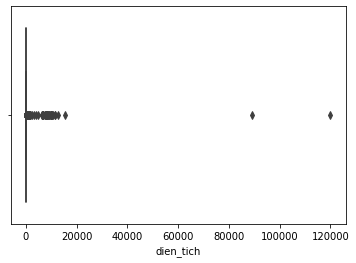

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=at_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


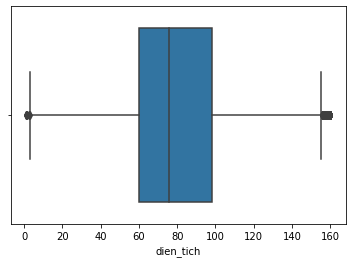

In [ ]:
at_data_new = outliner_remove(at_data_new, 'dien_tich')
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['dien_tich'])

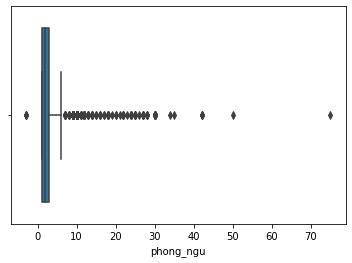

In [ ]:
sns.boxplot(x=at_data_new['phong_ngu'])

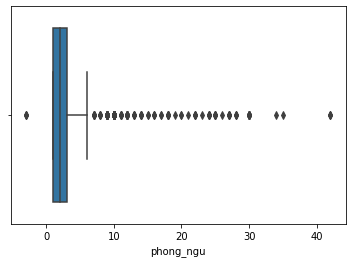

In [ ]:
at_data_new = at_data_new[at_data_new['phong_ngu'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['phong_ngu'])

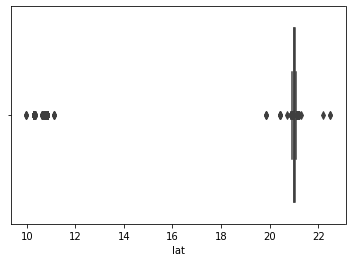

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['lat']) 

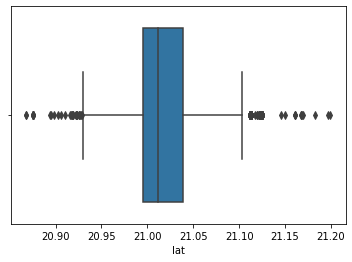

In [ ]:
at_data_new = at_data_new[at_data_new['lat'] <21.2]
at_data_new = at_data_new[at_data_new['lat'] >20.8]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['lat']) 

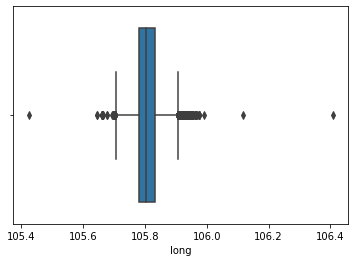

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['long'])

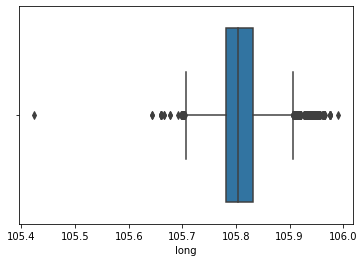

In [ ]:
at_data_new = at_data_new[at_data_new['long'] <106.1]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['long'])

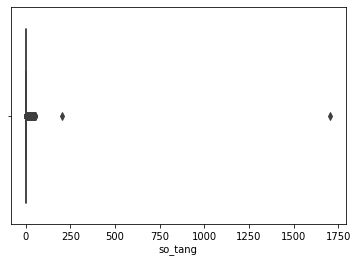

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=at_data_new['so_tang'])

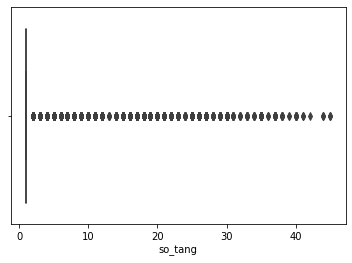

In [ ]:
at_data_new = at_data_new[at_data_new['so_tang'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['so_tang'])

In [ ]:
at_data_new['the_loai'] = 'Apartment'

In [ ]:
at_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia,the_loai
0,75.0,2.0,1.0,có,21.031035,105.815152,Quận Ba Đình,KXĐ,6300.000,Apartment
1,115.0,3.0,1.0,có,21.031130,105.814818,Quận Ba Đình,Tây Bắc,10250.000,Apartment
2,100.0,2.0,1.0,có,21.020889,105.815820,Quận Ba Đình,Nam,2600.000,Apartment
3,30.0,2.0,2.0,có,21.028785,105.821409,Quận Ba Đình,KXĐ,3500.000,Apartment
4,72.0,2.0,3.0,có,21.043654,105.841574,Quận Ba Đình,Đông,1750.000,Apartment
...,...,...,...,...,...,...,...,...,...,...
30353,35.0,1.0,1.0,không,21.071830,105.797201,Quận Bắc Từ Liêm,KXĐ,550.000,Apartment
30354,122.0,4.0,1.0,không,21.040789,105.765044,Quận Bắc Từ Liêm,KXĐ,11.000,Apartment
30355,72.0,2.0,1.0,không,21.047770,105.792404,Quận Bắc Từ Liêm,KXĐ,9.000,Apartment
30356,54.0,2.0,1.0,không,21.168425,105.741163,Huyện Mê Linh,KXĐ,432.000,Apartment


#LandTrading data

In [ ]:
lt_data = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
lt_data

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,220.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,30000.0,136.363636,NaN,NaN,5e958ee8208d0d6d7648f9cc,Phố Linh Lang,10.0,Ngõ 4 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
1,500.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,195000.0,390.000000,NaN,NaN,5e958ee8208d0d6d7648f96d,Đường Cao Bá Quát,40.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e9,Phường Điện Biên
2,154.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,40000.0,259.740260,NaN,NaN,5e958ee8208d0d6d7648f978,Đường Đội Cấn,20.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ea,Phường Đội Cấn
3,116.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,14300.0,123.275862,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,8.0,Ngõ 3 ô tô tránh,5e5501cbeb80a7245175e0e4,Phường Cống Vị
4,195.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,1.0,NaN,NaN,...,26500.0,135.897436,NaN,NaN,5e958ee8208d0d6d7648f97a,Đường Giang Văn Minh,100.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0ec,Phường Kim Mã
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27249,72.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,670.0,9.305556,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2e5,Xã Hoàng Long
27250,90.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,800.0,8.888889,NaN,NaN,5e958eef208d0d6d76490f18,Đường Quốc lộ 1A,NaN,NaN,5e5501cceb80a7245175e2e4,Xã Hồng Thái
27251,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,5e958eef208d0d6d76490f1c,Đường Tỉnh lộ 428,NaN,NaN,5e5501cceb80a7245175e2ed,Xã Phúc Tiến
27252,100.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dedd,Huyện Phú Xuyên,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5e5501cceb80a7245175e2db,Thị trấn Phú Xuyên


In [ ]:
print("Trước: ",lt_data.ten_quan.unique())
at_data["ten_quan"].replace({"Hà Đông": "Quận Hà Đông",
                             'Sơn Tây':'Thị xã Sơn Tây',
                             'Đan Phượng':'Huyện Đan Phượng',
                             'Quốc Oai':'Huyện Quốc Oai',
                             'Thạch Thất':'Huyện Thạch Thất',
                             'Thường Tín':'Huyện Thường Tín',
                             'Tây Hồ':'Quận Tây Hồ',
                             'Long Biên':'Quận Long Biên',
                             'Đống Đa':'Quận Đống Đa',
                             'Hai Bà Trưng':'Quận Hai Bà Trưng',
                             'Hoàng Mai':'Quận Hoàng Mai',
                             'Thanh Xuân':'Quận Thanh Xuân',
                             'Sóc Sơn':'Huyện Sóc Sơn',
                             'Nam Từ Liêm':'Quận Nam Từ Liêm',
                             'Thanh Trì':'Huyện Thanh Trì',
                             'Bắc Từ Liêm':'Quận Bắc Từ Liêm',
                             'Phú Xuyên':'Huyện Phú Xuyên'}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Trước:  ['Quận Ba Đình' 'Quận Hà Đông' 'Hà Đông' 'Thị xã Sơn Tây' 'Sơn Tây'
 'Huyện Ba Vì' 'Huyện Phúc Thọ' 'Huyện Đan Phượng' 'Đan Phượng'
 'Huyện Hoài Đức' 'Huyện Quốc Oai' 'Quốc Oai' 'Huyện Thạch Thất'
 'Thạch Thất' 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín'
 'Thường Tín' 'Quận Hoàn Kiếm' 'Huyện Ứng Hòa' 'Huyện Mỹ Đức'
 'Quận Tây Hồ' 'Tây Hồ' 'Quận Long Biên' 'Long Biên' 'Quận Cầu Giấy'
 'Quận Đống Đa' 'Đống Đa' 'Quận Hai Bà Trưng' 'Hai Bà Trưng' 'Hoàng Mai'
 'Quận Hoàng Mai' 'Quận Thanh Xuân' 'Thanh Xuân' 'Huyện Sóc Sơn' 'Sóc Sơn'
 'Huyện Đông Anh' 'Huyện Gia Lâm' 'Nam Từ Liêm' 'Quận Nam Từ Liêm'
 'Thanh Trì' 'Huyện Thanh Trì' 'Quận Bắc Từ Liêm' 'Bắc Từ Liêm'
 'Huyện Mê Linh' 'Huyện Phú Xuyên' 'Phú Xuyên']
Sau:  ['Quận Ba Đình' 'Quận Hà Đông' 'Huyện Ba Vì' 'Huyện Đan Phượng'
 'Huyện Hoài Đức' 'Quận Hoài Đức' 'Huyện Quốc Oai' 'Huyện Thạch Thất'
 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín' 'Quận Hoàn Kiếm'
 'Quận Tây Hồ' 'Quận Long Biên' 'Quận Cầu Giấy' 'Quận Đ

In [ ]:
print("Trước: ",lt_data.huong_nha.unique())
lt_data["huong_nha"].replace({"Tây-Bắc": "Tây Bắc", 
                       "Đông-Nam": "Đông nam", 
                       "Đông-Bắc": "Đông Bắc", 
                       "Tây-Nam": "Tây Nam",}
                      , inplace=True)
print("Sau: ",lt_data.huong_nha.unique())

Trước:  [nan 'Đông' 'Đông Nam' 'KXĐ' 'Tây' 'Đông Bắc' 'Tây Nam' 'Bắc' 'Nam'
 'Tây-Bắc' 'Đông-Bắc' 'Tây-Nam' 'Đông-Nam' 'Tây Bắc' 'Đông nam']
Sau:  [nan 'Đông' 'Đông Nam' 'KXĐ' 'Tây' 'Đông Bắc' 'Tây Nam' 'Bắc' 'Nam'
 'Tây Bắc' 'Đông nam']


In [ ]:
replaceNAN(lt_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 12566 giá trị nan thành: không


In [ ]:
for i in lt_data['so_do'].unique():
  if i != "không":
    lt_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")
lt_data["so_do"].unique()

Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Sổ hồng  Thành công
Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Có sổ đỏ  Thành công
Chuyển  Đã có sổ đỏ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sổ đỏ chính chủ, nở hậu, sẵn sàng giao dịch.  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch  Thành công
Chuyển  Sổ chính chủ vuông đẹp  Thành công
Chuyển  Hồ sơ pháp lý đầy đủ.  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý sạch đẹp.  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý chuẩn.  Thành công
Chuyển  Hồ sơ văn tự  Thành công
Chuyển  Sổ đỏ sẵn sàng  Thành công
Chuyển  Sổ đỏ, pháp lý đầy đủ, minh bạch.  Thành công
Chuyển  Sổ đỏ đầy đủ.  Thành công
Chuyển  Sổ đỏ chính chủ sẵn sàng giao dịch.  Thành công
Chuyển  Đã có sổ đỏ, vuông vắn, nở hậu  Thành công
Chuyển  Sổ đỏ vuông vắn chính chủ, pháp lý rõ ràng, quy hoạch ổn định.  Thành 

array(['có', 'không'], dtype=object)

In [ ]:
#Dữ liệu để dự đoán giá nhà
lt_data_new = lt_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','gia']]

In [ ]:
lt_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia
0,220.0,1.0,1.0,có,21.035456,105.810210,Quận Ba Đình,NaN,30000.0
1,500.0,NaN,NaN,có,21.030160,105.839556,Quận Ba Đình,NaN,195000.0
2,154.0,1.0,1.0,có,21.034405,105.831625,Quận Ba Đình,NaN,40000.0
3,116.0,NaN,NaN,có,21.032373,105.809571,Quận Ba Đình,NaN,14300.0
4,195.0,1.0,1.0,có,21.029599,105.827306,Quận Ba Đình,NaN,26500.0
...,...,...,...,...,...,...,...,...,...
27249,72.0,NaN,NaN,có,20.775086,105.826094,Huyện Phú Xuyên,NaN,670.0
27250,90.0,NaN,NaN,có,20.758092,105.912060,Huyện Phú Xuyên,Nam,800.0
27251,100.0,NaN,NaN,không,20.704557,105.845669,Huyện Phú Xuyên,NaN,NaN
27252,100.0,NaN,NaN,có,20.716869,105.890686,Huyện Phú Xuyên,NaN,NaN


In [ ]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
lt_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
lt_data_new.isna().sum()

dien_tich      103
phong_ngu    21920
so_tang      21715
so_do            0
lat             25
long            25
ten_quan         0
huong_nha    15821
gia              0
dtype: int64

In [ ]:
removeNAN(lt_data_new, 'dien_tich')
removeNAN(lt_data_new, 'lat')
removeNAN(lt_data_new, 'long')

replaceNAN(lt_data_new, 'phong_ngu',1)
replaceNAN(lt_data_new, 'so_tang',1)
replaceNAN(lt_data_new, 'huong_nha','KXĐ')
print(lt_data_new.isna().sum())
lt_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",lt_data_new.shape[0],"dòng")

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' lat ' đã xóa giá trị nan
Cột ' long ' không có giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 21796 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 21591 giá trị nan thành: 1
Cột ' huong_nha ' đã chuyển đổi 15718 giá trị nan thành: KXĐ
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
ten_quan     0
huong_nha    0
gia          0
dtype: int64
Hiện có: 22841 dòng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


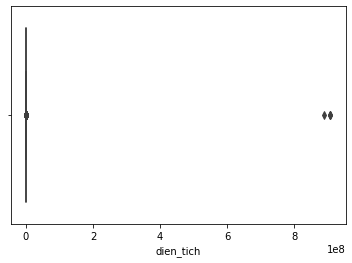

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=lt_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


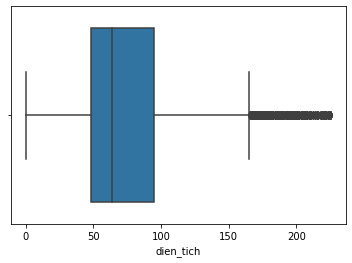

In [ ]:
lt_data_new = outliner_remove(lt_data_new, 'dien_tich')
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['dien_tich'])

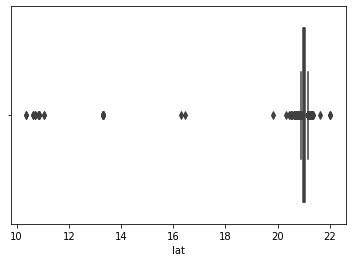

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=lt_data_new['lat'])

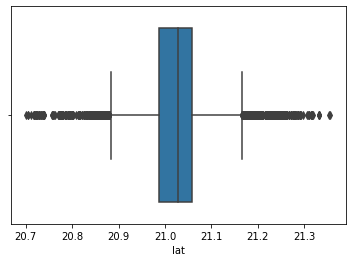

In [ ]:
lt_data_new = lt_data_new[lt_data_new['lat'] >20.7]
lt_data_new = lt_data_new[lt_data_new['lat'] <21.6]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['lat'])

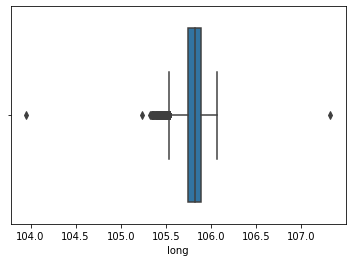

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=lt_data_new['long'])

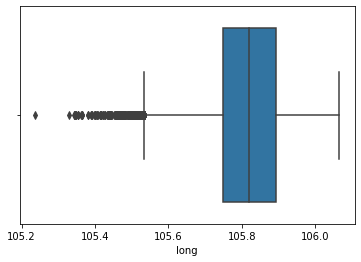

In [ ]:
lt_data_new = lt_data_new[lt_data_new['long'] >105]
lt_data_new = lt_data_new[lt_data_new['long'] <107]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['long'])

In [ ]:
lt_data_new['the_loai'] = 'Land'

In [ ]:
lt_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia,the_loai
0,220.0,1.0,1.0,có,21.035456,105.810210,Quận Ba Đình,KXĐ,30000.000000,Land
1,154.0,1.0,1.0,có,21.034405,105.831625,Quận Ba Đình,KXĐ,40000.000000,Land
2,116.0,1.0,1.0,có,21.032373,105.809571,Quận Ba Đình,KXĐ,14300.000000,Land
3,195.0,1.0,1.0,có,21.029599,105.827306,Quận Ba Đình,KXĐ,26500.000000,Land
4,100.0,5.0,1.0,có,21.031460,105.822657,Quận Ba Đình,KXĐ,5400.000000,Land
...,...,...,...,...,...,...,...,...,...,...
19746,72.0,1.0,1.0,có,20.775086,105.826094,Huyện Phú Xuyên,KXĐ,0.555555,Land
19747,72.0,1.0,1.0,có,20.838600,105.808333,Huyện Phú Xuyên,KXĐ,600.000000,Land
19748,120.0,1.0,1.0,có,20.768980,105.806281,Huyện Phú Xuyên,KXĐ,554.480000,Land
19749,72.0,1.0,1.0,có,20.775086,105.826094,Huyện Phú Xuyên,KXĐ,670.000000,Land


#RoadSurfaceHouseTrading data

In [ ]:
rsht_data = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]
rsht_data

,dien_tich,huong_ban_cong,phong_ngu,id_thanh_pho,ten_thanh_pho,id_quan,ten_quan,so_tang,mat_tien,noi_that,...,gia,gia_m2,du_an,project_name,id_duong,ten_duong,do_rong_duong,do_rong_duong_ml,id_phuong,ten_phuong
0,42.0,NaN,2.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,NaN,NaN,3.0,NaN,NaN,...,2250.0,53.571429,NaN,NaN,NaN,NaN,3.0,Mặt phố - Mặt đường,5e5501cbeb80a7245175e1ae,Phường Tây Mỗ
1,220.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,NaN,NaN,NaN,...,61000.0,277.272727,NaN,NaN,NaN,NaN,NaN,Mặt phố - Mặt đường,NaN,NaN
2,69.0,Đông-Nam,9.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,7.0,8.3,"Nhà xây kiên cố, sơn nhà trắng Kova mới sơn lạ...",...,21000.0,304.347826,NaN,NaN,5e958ee8208d0d6d7648f98f,Đường Nguyễn Công Hoan,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0eb,Phường Ngọc Khánh
3,50.0,NaN,NaN,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,NaN,NaN,...,25000.0,500.000000,NaN,NaN,5e958ee8208d0d6d7648f9ac,Đường Trần Phú,NaN,Mặt phố - Mặt đường,5e5501cbeb80a7245175e0ec,Phường Kim Mã
4,72.0,NaN,5.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175de1a,Quận Ba Đình,5.0,6.0,NaN,...,12000.0,166.666667,NaN,NaN,5e958ee8208d0d6d7648f974,Đường Đào Tấn,60.0,Ngõ 4 ô tô trở lên,5e5501cbeb80a7245175e0e4,Phường Cống Vị
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62842,80.0,NaN,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,3.0,NaN,NaN,...,4500.0,56.250000,NaN,NaN,NaN,NaN,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1e0,Xã Tiền Phong
62843,80.0,NaN,3.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,3.0,NaN,NaN,...,4950.0,61.875000,NaN,NaN,5e958eee208d0d6d76490ae8,Đường Phố Yên,10.0,Mặt phố - Mặt đường,5e5501cceb80a7245175e1e0,Xã Tiền Phong
62844,105.0,NaN,6.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,NaN,5.0,Không NT,...,NaN,NaN,NaN,NaN,5e958eee208d0d6d76490ae7,Đường Ngô Miễn,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1d2,Xã Kim Hoa
62845,70.0,NaN,1.0,5e5501caeb80a7245175dddb,Thành phố Hà Nội,5e5501caeb80a7245175dec6,Huyện Mê Linh,1.0,NaN,NaN,...,2400.0,34.285714,NaN,NaN,5e958eee208d0d6d76490aeb,Đường Quốc lộ 23,NaN,Mặt phố - Mặt đường,5e5501cceb80a7245175e1dd,Xã Mê Linh


In [ ]:
print("Trước: ",rsht_data.ten_quan.unique())
rsht_data["ten_quan"].replace({'Ba Đình': 'Quận Ba Đình',
                               'Hà Đông':'Quận Hà Đông',
                               'Thường Tín':'Huyện Thường Tín',
                               'Hoàn Kiếm':'Quận Hoàn Kiếm',
                               'Tây Hồ' :'Quận Tây Hồ',
                               'Long Biên':'Quận Long Biên',
                               'Cầu Giấy':'Quận Cầu Giấy',
                               'Đống Đa':'Quận Đống Đa',
                               'Hai Bà Trưng':'Quận Hai Bà Trưng',
                               'Hoàng Mai' :'Quận Hoàng Mai',
                               'Thanh Xuân':'Quận Thanh Xuân',
                               'Nam Từ Liêm':'Quận Nam Từ Liêm',
                               'Bắc Từ Liêm':'Quận Bắc Từ Liêm'}
                      , inplace=True)
print("Sau: ",rsht_data.ten_quan.unique())

Trước:  [nan 'Quận Ba Đình' 'Ba Đình' 'Hà Đông' 'Quận Hà Đông' 'Thị xã Sơn Tây'
 'Huyện Ba Vì' 'Huyện Đan Phượng' 'Huyện Hoài Đức' 'Huyện Quốc Oai'
 'Huyện Thạch Thất' 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín'
 'Thường Tín' 'Quận Hoàn Kiếm' 'Hoàn Kiếm' 'Tây Hồ' 'Quận Tây Hồ'
 'Quận Long Biên' 'Long Biên' 'Quận Cầu Giấy' 'Cầu Giấy' 'Quận Đống Đa'
 'Đống Đa' 'Quận Hai Bà Trưng' 'Hai Bà Trưng' 'Hoàng Mai' 'Quận Hoàng Mai'
 'Quận Thanh Xuân' 'Thanh Xuân' 'Huyện Sóc Sơn' 'Huyện Đông Anh'
 'Huyện Gia Lâm' 'Quận Nam Từ Liêm' 'Nam Từ Liêm' 'Huyện Thanh Trì'
 'Quận Bắc Từ Liêm' 'Bắc Từ Liêm' 'Huyện Mê Linh']
Sau:  [nan 'Quận Ba Đình' 'Quận Hà Đông' 'Thị xã Sơn Tây' 'Huyện Ba Vì'
 'Huyện Đan Phượng' 'Huyện Hoài Đức' 'Huyện Quốc Oai' 'Huyện Thạch Thất'
 'Huyện Chương Mỹ' 'Huyện Thanh Oai' 'Huyện Thường Tín' 'Quận Hoàn Kiếm'
 'Quận Tây Hồ' 'Quận Long Biên' 'Quận Cầu Giấy' 'Quận Đống Đa'
 'Quận Hai Bà Trưng' 'Quận Hoàng Mai' 'Quận Thanh Xuân' 'Huyện Sóc Sơn'
 'Huyện Đông Anh' 'Huyện Gi

In [ ]:
print("Trước: ",rsht_data.huong_nha.unique())
rsht_data["huong_nha"].replace({"Tây-Bắc": "Tây Bắc", 
                       "Đông-Nam": "Đông nam", 
                       "Đông-Bắc": "Đông Bắc", 
                       "Tây-Nam": "Tây Nam",}
                      , inplace=True)
print("Sau: ",rsht_data.huong_nha.unique())

Trước:  [nan 'Đông-Nam' 'Đông' 'Đông Bắc' 'Tây Bắc' 'Bắc' 'Đông Nam' 'Nam' 'Tây'
 'KXĐ' 'Tây Nam' 'Tây-Nam' 'Đông-Bắc' 'Tây-Bắc' 'Đông nam']
Sau:  [nan 'Đông nam' 'Đông' 'Đông Bắc' 'Tây Bắc' 'Bắc' 'Đông Nam' 'Nam' 'Tây'
 'KXĐ' 'Tây Nam']


In [ ]:
replaceNAN(rsht_data, 'so_do', 'không')

Cột ' so_do ' đã chuyển đổi 23273 giá trị nan thành: không


In [ ]:
for i in rsht_data['so_do'].unique():
  if i != "không":
    rsht_data["so_do"].replace({i: "có"}, inplace=True)
    print("Chuyển ",i," Thành công")
rsht_data["so_do"].unique()

Chuyển  Giấy đỏ  Thành công
Chuyển  Đã có sổ  Thành công
Chuyển  Đã có sổ hồng  Thành công
Chuyển  Sổ hồng/ Sổ đỏ  Thành công
Chuyển  Sổ đỏ  Thành công
Chuyển  Giấy tờ hợp lệ  Thành công
Chuyển  Có sổ  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lí rõ ràng.  Thành công
Chuyển  Sổ đỏ đẹp nở hậu sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch.  Thành công
Chuyển  Pháp lý cực chuẩn, sổ đỏ chính chủ, nở hậu phong thuỷ quá đẹp, sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ chính chủ  Thành công
Chuyển  Sổ đỏ.  Thành công
Chuyển  Sổ đỏ chính chủ vuông vắn nở hậu.  Thành công
Chuyển  Sổ đỏ chính chủ.  Thành công
Chuyển  Pháp lý sạch, không quy hoạch  Thành công
Chuyển  Nhà có sổ đỏ chính chủ vuông vắn và riêng biệt.  Thành công
Chuyển  Sổ đỏ chính chủ, giao dịch ngay  Thành công
Chuyển  Sổ đỏ chính chủ, vuông vắn.  Thành công
Chuyển  Sổ đỏ chính chủ, vuông vắn 1 sổ, 1 chủ.  Thành công
Chuyển  Sổ đỏ vuông đẹp sẵn sàng giao dịch  Thành công
Chuyển  Sổ đỏ chính chủ, pháp lý

array(['có', 'không'], dtype=object)

In [ ]:
#Dữ liệu để dự đoán giá nhà
rsht_data_new = rsht_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','gia']]
rsht_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia
0,42.0,2.0,3.0,có,21.008853,105.743919,NaN,NaN,2250.0
1,220.0,NaN,NaN,có,21.033781,105.814054,Quận Ba Đình,NaN,61000.0
2,69.0,9.0,7.0,có,21.027277,105.815289,Quận Ba Đình,Đông nam,21000.0
3,50.0,NaN,5.0,không,21.032735,105.830108,Quận Ba Đình,NaN,25000.0
4,72.0,5.0,5.0,có,21.034090,105.806928,Quận Ba Đình,NaN,12000.0
...,...,...,...,...,...,...,...,...,...
62842,80.0,3.0,3.0,có,21.018166,105.847905,Huyện Mê Linh,NaN,4500.0
62843,80.0,3.0,3.0,có,21.149180,105.758726,Huyện Mê Linh,NaN,4950.0
62844,105.0,6.0,NaN,có,21.228113,105.736179,Huyện Mê Linh,NaN,NaN
62845,70.0,1.0,1.0,có,21.164764,105.744397,Huyện Mê Linh,NaN,2400.0


In [ ]:
#Loại bỏ giá trị nan có trong giá nhà để dự đoán chính xác hơn
rsht_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
rsht_data_new.isna().sum()

dien_tich      227
phong_ngu    24589
so_tang      15197
so_do            0
lat             40
long            40
ten_quan         1
huong_nha    54496
gia              0
dtype: int64

In [ ]:
removeNAN(rsht_data_new, 'dien_tich')
removeNAN(rsht_data_new, 'lat')
removeNAN(rsht_data_new, 'long')
removeNAN(rsht_data_new, 'ten_quan')

replaceNAN(rsht_data_new, 'phong_ngu',1)
replaceNAN(rsht_data_new, 'so_tang',1)
replaceNAN(rsht_data_new, 'huong_nha','KXĐ')
print(rsht_data_new.isna().sum())
rsht_data_new.reset_index(drop=True, inplace=True)
print("Hiện có:",rsht_data_new.shape[0],"dòng")

Cột ' dien_tich ' đã xóa giá trị nan
Cột ' lat ' đã xóa giá trị nan
Cột ' long ' không có giá trị nan
Cột ' ten_quan ' đã xóa giá trị nan
Cột ' phong_ngu ' đã chuyển đổi 24378 giá trị nan thành: 1
Cột ' so_tang ' đã chuyển đổi 15074 giá trị nan thành: 1
Cột ' huong_nha ' đã chuyển đổi 54300 giá trị nan thành: KXĐ
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
ten_quan     0
huong_nha    0
gia          0
dtype: int64
Hiện có: 60690 dòng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


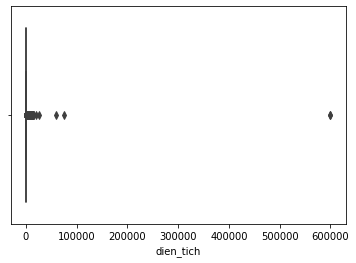

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=rsht_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


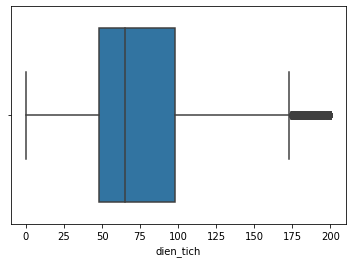

In [ ]:
rsht_data_new = outliner_remove(rsht_data_new, 'dien_tich')
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['dien_tich'])

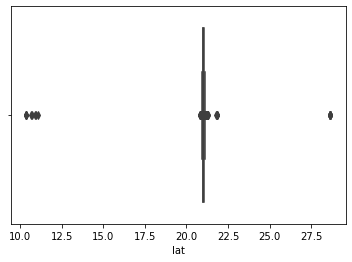

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=rsht_data_new['lat'])

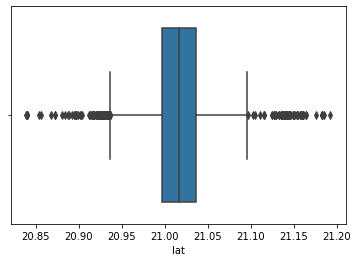

In [ ]:
rsht_data_new = rsht_data_new[rsht_data_new['lat'] >15]
rsht_data_new = rsht_data_new[rsht_data_new['lat'] <21.2]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['lat'])

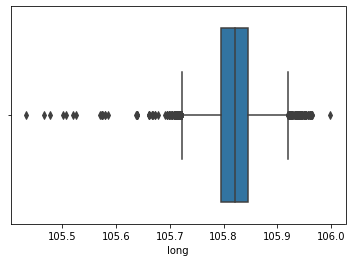

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
sns.boxplot(x=rsht_data_new['long'])

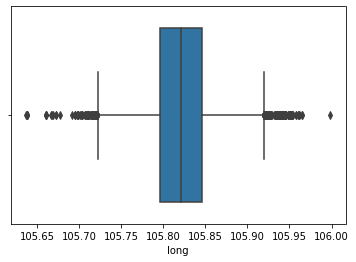

In [ ]:
rsht_data_new = rsht_data_new[rsht_data_new['long'] >105.6]
rsht_data_new = rsht_data_new[rsht_data_new['long'] <106]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['long'])

In [ ]:
rsht_data_new['the_loai'] = 'Road'

In [ ]:
rsht_data_new

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia,the_loai
0,69.0,9.0,7.0,có,21.027277,105.815289,Quận Ba Đình,Đông nam,21000.0,Road
1,50.0,1.0,5.0,không,21.032735,105.830108,Quận Ba Đình,KXĐ,25000.0,Road
2,72.0,5.0,5.0,có,21.034090,105.806928,Quận Ba Đình,KXĐ,12000.0,Road
3,50.0,3.0,5.0,không,20.955835,105.756366,Quận Ba Đình,KXĐ,16000.0,Road
4,50.0,3.0,5.0,không,21.034188,105.833891,Quận Ba Đình,KXĐ,16000.0,Road
...,...,...,...,...,...,...,...,...,...,...
55371,80.0,3.0,3.0,có,21.018166,105.847905,Huyện Mê Linh,KXĐ,4500.0,Road
55372,80.0,3.0,3.0,có,21.018166,105.847905,Huyện Mê Linh,KXĐ,4500.0,Road
55373,80.0,3.0,3.0,có,21.149180,105.758726,Huyện Mê Linh,KXĐ,4950.0,Road
55374,70.0,1.0,1.0,có,21.164764,105.744397,Huyện Mê Linh,KXĐ,2400.0,Road


#Tổng hợp

In [ ]:
data = pd.concat([at_data_new, lt_data_new, rsht_data_new])
mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]
data = data[data['gia'] >1000]

data.reset_index(drop=True, inplace=True)
data

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia,the_loai
0,75.0,2.0,1.0,có,21.031035,105.815152,Quận Ba Đình,KXĐ,6300,Apartment
1,115.0,3.0,1.0,có,21.031130,105.814818,Quận Ba Đình,Tây Bắc,10250,Apartment
2,100.0,2.0,1.0,có,21.020889,105.815820,Quận Ba Đình,Nam,2600,Apartment
3,30.0,2.0,2.0,có,21.028785,105.821409,Quận Ba Đình,KXĐ,3500,Apartment
4,72.0,2.0,3.0,có,21.043654,105.841574,Quận Ba Đình,Đông,1750,Apartment
...,...,...,...,...,...,...,...,...,...,...
96570,80.0,3.0,3.0,có,21.018166,105.847905,Huyện Mê Linh,KXĐ,4500,Road
96571,80.0,3.0,3.0,có,21.018166,105.847905,Huyện Mê Linh,KXĐ,4500,Road
96572,80.0,3.0,3.0,có,21.149180,105.758726,Huyện Mê Linh,KXĐ,4950,Road
96573,70.0,1.0,1.0,có,21.164764,105.744397,Huyện Mê Linh,KXĐ,2400,Road


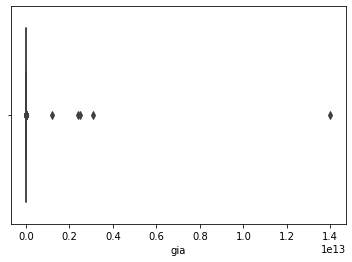

In [ ]:
#Kiểm tra và xử lý dữ liệu ngoại lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=data['gia'])

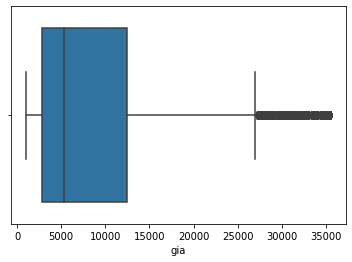

In [ ]:
data = outliner_remove(data, 'gia')
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['gia'])

In [ ]:
dict_so_do = {
    "so_do":{
        "không":1.0,
        "có":2.0
    }}

dict_the_loai = {
    "the_loai":{
        "Apartment":1.0,
        "Land":2.0,
        "Road":3.0
    }}

dict_ten_quan = dict(enumerate(data.ten_quan.unique()))
dict_ten_quan = {v: k for k, v in dict_ten_quan.items()}
dict_ten_quan = {
    'ten_quan': dict_ten_quan
}

dict_huong_nha = dict(enumerate(data.huong_nha.unique()))
dict_huong_nha = {v: k for k, v in dict_huong_nha.items()}
dict_huong_nha = {
    'huong_nha': dict_huong_nha
}

for i in [dict_so_do, dict_the_loai, dict_ten_quan, dict_huong_nha]:
    data.replace(i,inplace=True)

In [ ]:
data.so_do.unique()

array([2., 1.])

In [ ]:
data.the_loai.unique()

array([1., 2., 3.])

In [ ]:
data.ten_quan.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [ ]:
data.huong_nha.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
data

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia,the_loai
0,75.0,2.0,1.0,2.0,21.031035,105.815152,0,0,6300,1.0
1,115.0,3.0,1.0,2.0,21.031130,105.814818,0,1,10250,1.0
2,100.0,2.0,1.0,2.0,21.020889,105.815820,0,2,2600,1.0
3,30.0,2.0,2.0,2.0,21.028785,105.821409,0,0,3500,1.0
4,72.0,2.0,3.0,2.0,21.043654,105.841574,0,3,1750,1.0
...,...,...,...,...,...,...,...,...,...,...
88077,80.0,3.0,3.0,2.0,21.018166,105.847905,42,0,4500,3.0
88078,80.0,3.0,3.0,2.0,21.018166,105.847905,42,0,4500,3.0
88079,80.0,3.0,3.0,2.0,21.149180,105.758726,42,0,4950,3.0
88080,70.0,1.0,1.0,2.0,21.164764,105.744397,42,0,2400,3.0


In [ ]:
data

,dien_tich,phong_ngu,so_tang,so_do,lat,long,ten_quan,huong_nha,gia,the_loai
0,75.0,2.0,1.0,2.0,21.031035,105.815152,0,0,6300,1.0
1,115.0,3.0,1.0,2.0,21.031130,105.814818,0,1,10250,1.0
2,100.0,2.0,1.0,2.0,21.020889,105.815820,0,2,2600,1.0
3,30.0,2.0,2.0,2.0,21.028785,105.821409,0,0,3500,1.0
4,72.0,2.0,3.0,2.0,21.043654,105.841574,0,3,1750,1.0
...,...,...,...,...,...,...,...,...,...,...
88077,80.0,3.0,3.0,2.0,21.018166,105.847905,42,0,4500,3.0
88078,80.0,3.0,3.0,2.0,21.018166,105.847905,42,0,4500,3.0
88079,80.0,3.0,3.0,2.0,21.149180,105.758726,42,0,4950,3.0
88080,70.0,1.0,1.0,2.0,21.164764,105.744397,42,0,2400,3.0


#Train with LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
names = ['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','the_loai']
x = data[names]
y = data['gia']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
Linreg = LinearRegression().fit(x_train, y_train)
y_predict=Linreg.predict(x_test)
y_predict

array([15297.01052899, 12150.8331088 ,  9812.65342226, ...,
       10796.35729736,   349.18629106, 12811.18174897])

In [ ]:
y_test

0        18500
1        11000
2         6400
3         7000
4        22500
         ...  
17612     1400
17613    14800
17614    11800
17615     2700
17616    11000
Name: gia, Length: 17617, dtype: int64

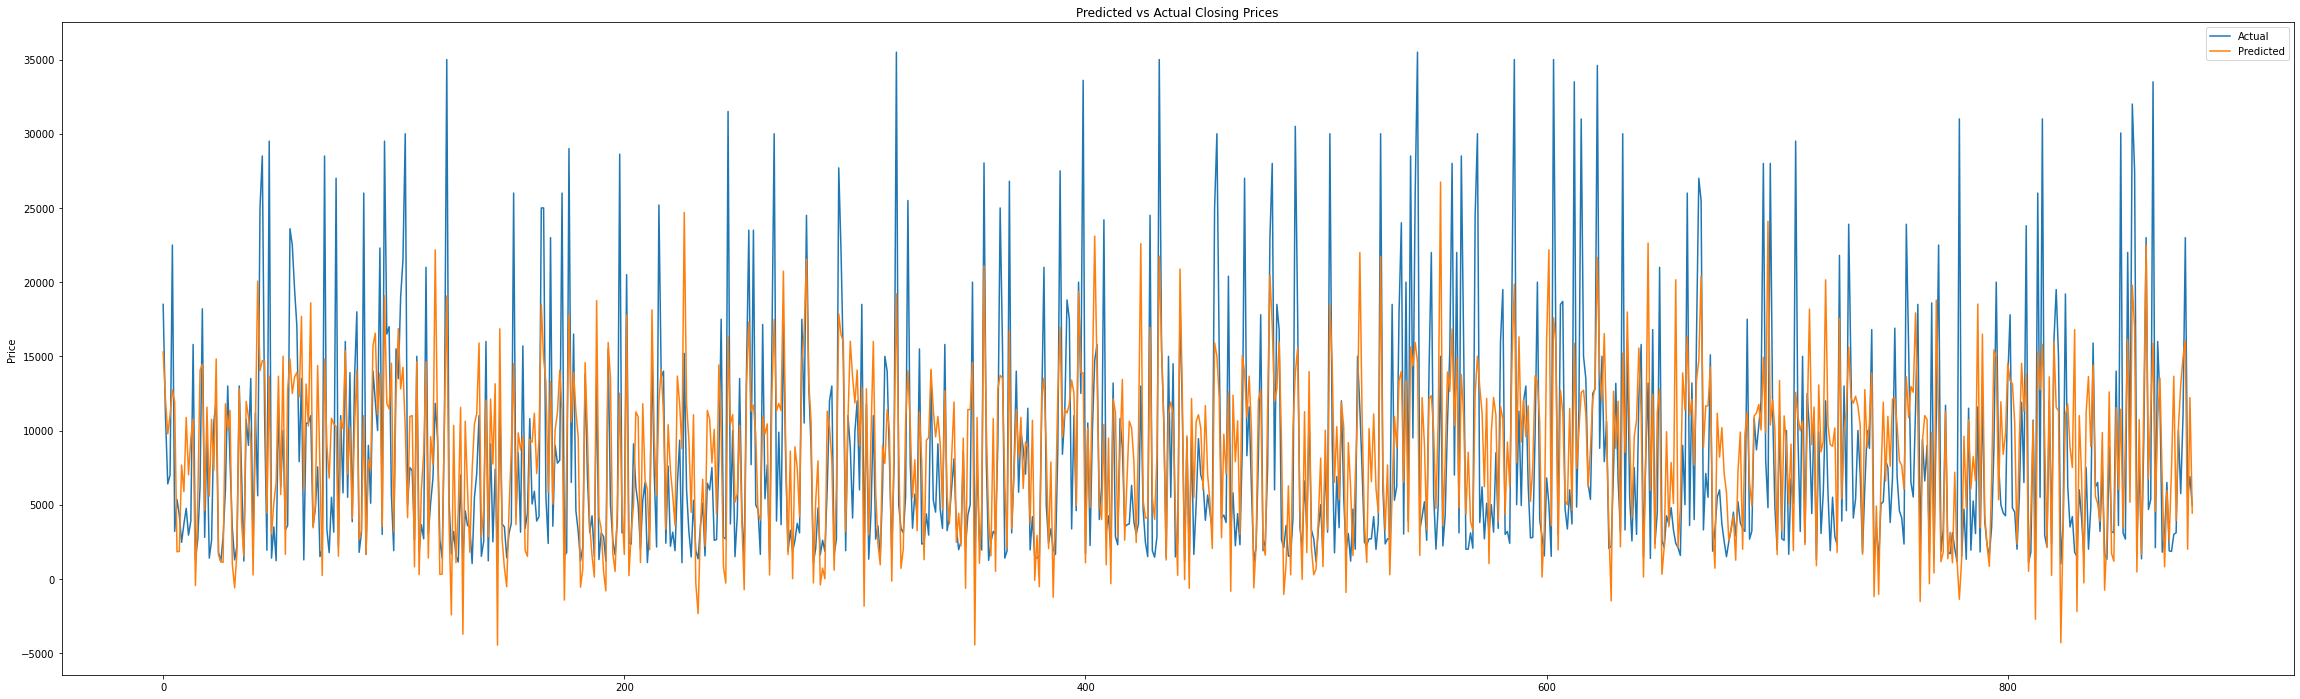

In [ ]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test, label='Actual')
plt.plot(y_predict.tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score 
print ("r2 model: ", r2_score(y_test, y_predict))

r2 model:  0.4826999988646159


#Train with DNN

In [ ]:
from tensorflow import keras

model = keras.models.Sequential(name="DNN_model")

model.add(keras.layers.Dense(9, activation='relu', input_shape=(9,)))
model.add(keras.layers.Dense(9, activation='relu'))
model.add(keras.layers.Dense(1))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)

model.summary()

Model: "DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 9)                 90        
                                                                 
 layer_1 (Dense)             (None, 9)                 90        
                                                                 
 layer_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate = 1e-3, decay= 1e-6)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
m = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1982/1982 [==============================] - 6s 3ms/step - loss: 88865608.0000 - accuracy: 0.0000e+00 - val_loss: 60477840.0000 - val_accuracy: 0.0000e+00
Epoch 2/30
1982/1982 [==============================] - 6s 3ms/step - loss: 67962312.0000 - accuracy: 0.0000e+00 - val_loss: 59310304.0000 - val_accuracy: 0.0000e+00
Epoch 3/30
1982/1982 [==============================] - 6s 3ms/step - loss: 65283036.0000 - accuracy: 0.0000e+00 - val_loss: 58351144.0000 - val_accuracy: 0.0000e+00
Epoch 4/30
1982/1982 [==============================] - 6s 3ms/step - loss: 63396292.0000 - accuracy: 0.0000e+00 - val_loss: 57548940.0000 - val_accuracy: 0.0000e+00
Epoch 5/30
1982/1982 [==============================] - 6s 3ms/step - loss: 61677740.0000 - accuracy: 0.0000e+00 - val_loss: 56797048.0000 - val_accuracy: 0.0000e+00
Epoch 6/30
1982/1982 [==============================] - 6s 3ms/step - loss: 60217128.0000 - accuracy: 0.0000e+00 - val_loss: 56135648.0000 - val_accuracy: 0.0000e+00
Epoc

In [ ]:
y_predict= m.predict(x_test, batch_size=1)

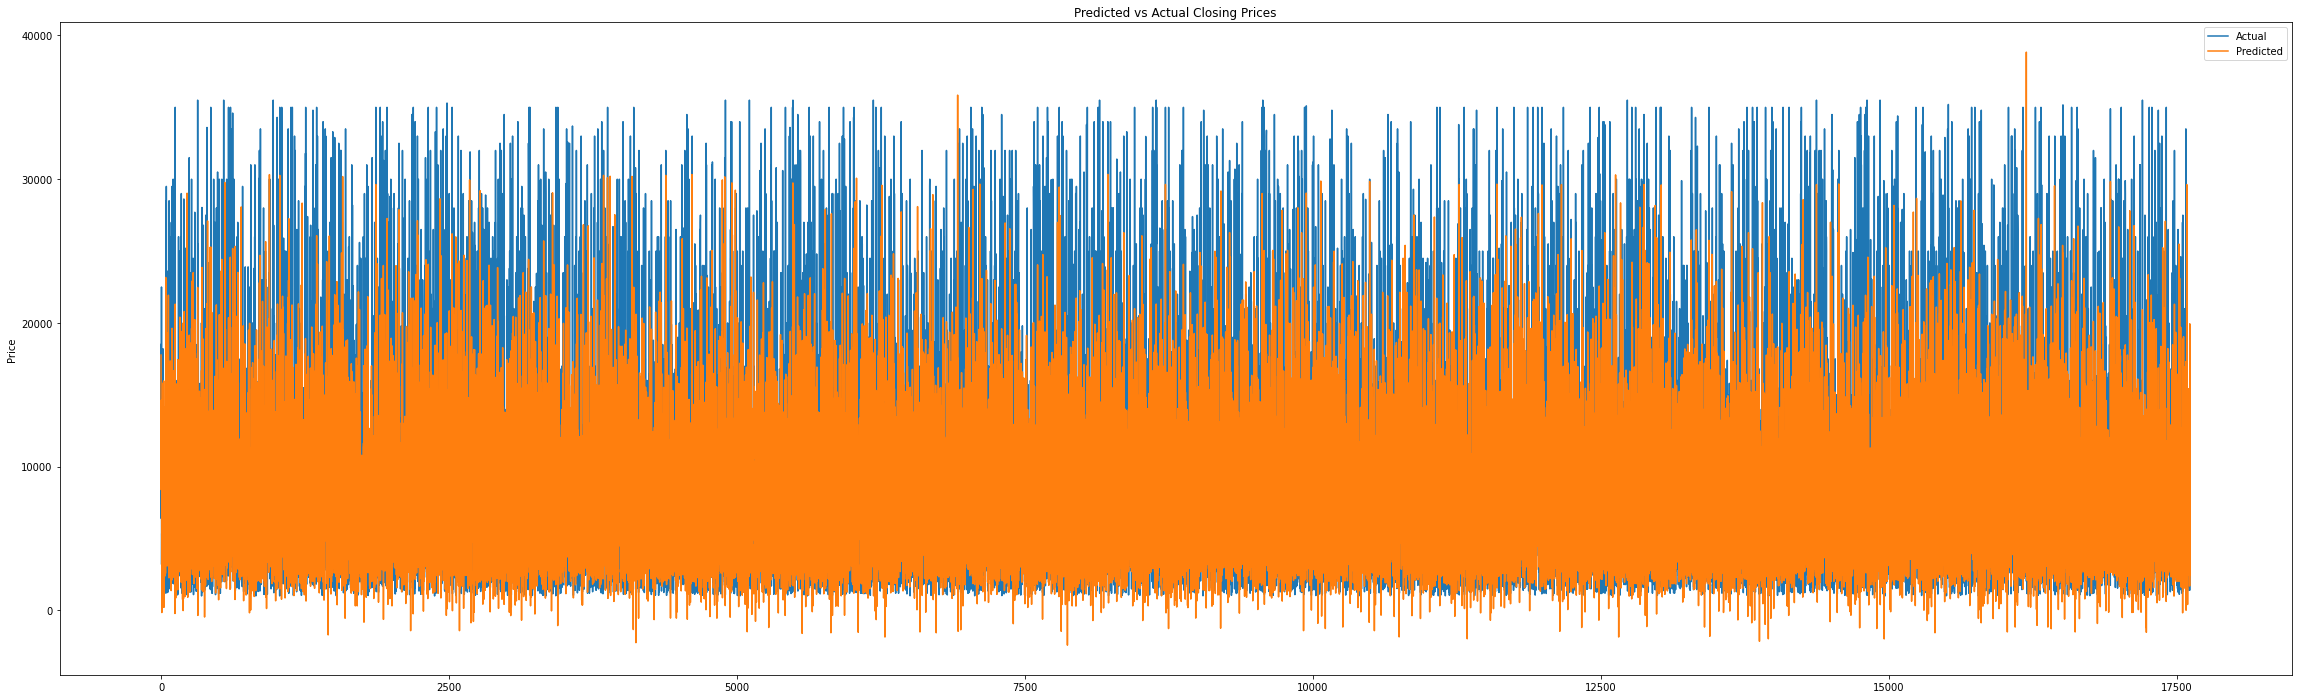

In [ ]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test, label='Actual')
plt.plot(y_predict.tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()